In [239]:
from scipy.io import wavfile
import scipy.io
import scipy.fft as fft
import matplotlib.pyplot as plt
import numpy as np

In [117]:
def map(x, in_min, in_max, out_min, out_max):
    return out_min + ((x - in_min) / float(in_max - in_min) * (out_max - out_min))

In [243]:
IN_FILE = "input.wav"
OUTL_FILE = "outl.wav"
OUTR_FILE = "outr.wav"

In [244]:
samplerate, data = wavfile.read(IN_FILE)
print(f"No. of Channels: {data.shape[1]}")
print(f"Sample Rate = {samplerate}")

No. of Channels: 2
Sample Rate = 44100


In [245]:
length = data.shape[0] / samplerate
print(f"Length {length}s")

Length 14.157823129251701s


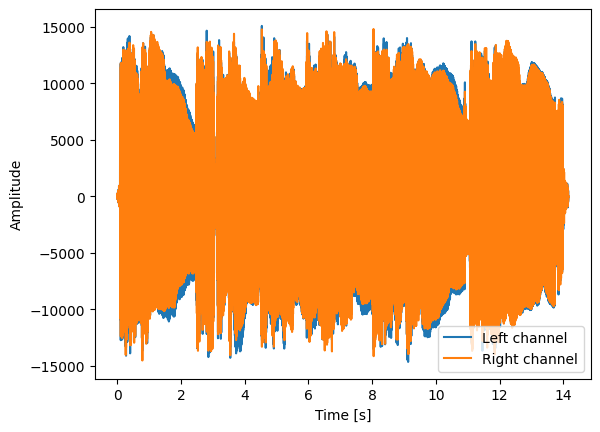

In [246]:
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

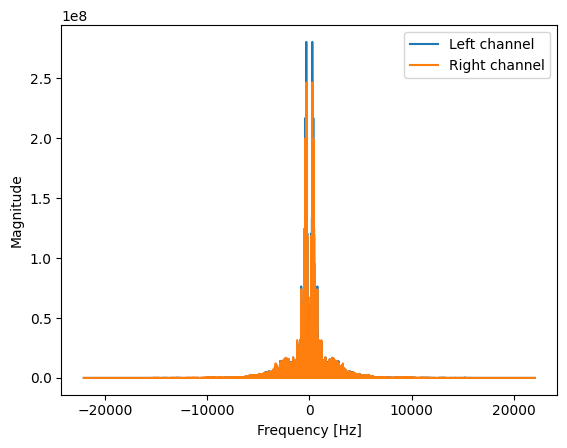

In [257]:
spectrum_l = fft.fftshift(fft.fft(data[:, 0]))
spectrum_r = fft.fftshift(fft.fft(data[:, 1]))
freq = fft.fftshift(fft.fftfreq(data.shape[0], 1 / samplerate))

plt.plot(freq, np.abs(spectrum_l), label="Left channel")
plt.plot(freq, np.abs(spectrum_r), label="Right channel")
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()

In [225]:
CARRIER_FREQ = 8.0
DEPTH = 0.6
carrier = np.cos(2 * np.pi * CARRIER_FREQ * time)
carrier = map(carrier, -1.0,  1.0, 1 - DEPTH, 1.0)

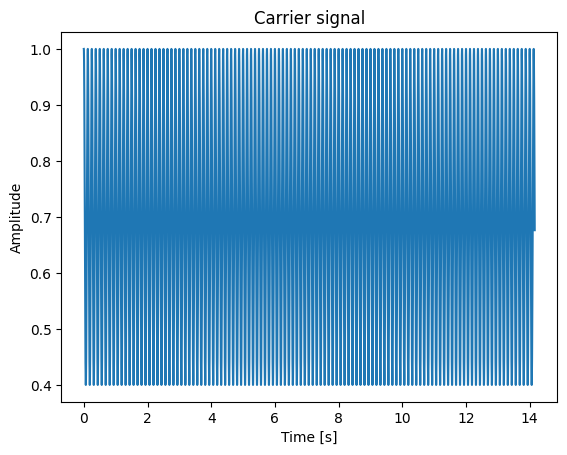

In [201]:
plt.plot(time, carrier)
plt.title("Carrier signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

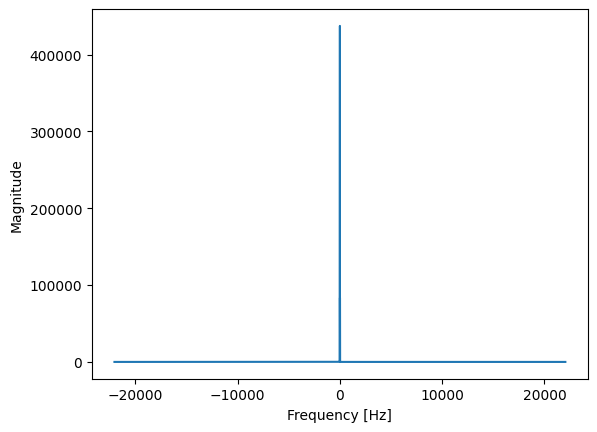

In [256]:
carrier_spectrum = fft.fftshift(fft.fft(carrier))
plt.plot(freq, np.abs(carrier_spectrum))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()

In [235]:
left_mod = data[:, 0] * carrier
right_mod = data[:, 1] * carrier

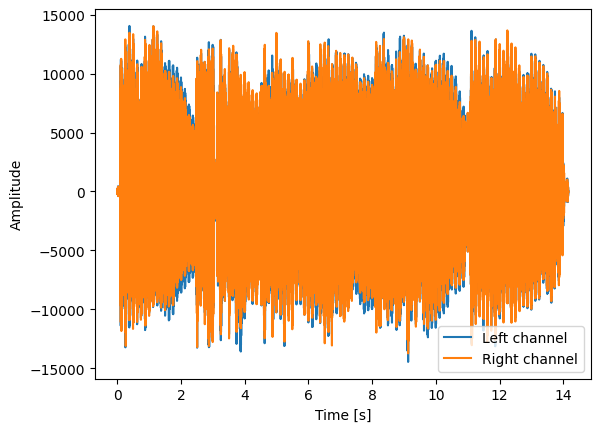

In [258]:
plt.plot(time, left_mod, label="Left channel")
plt.plot(time, right_mod, label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

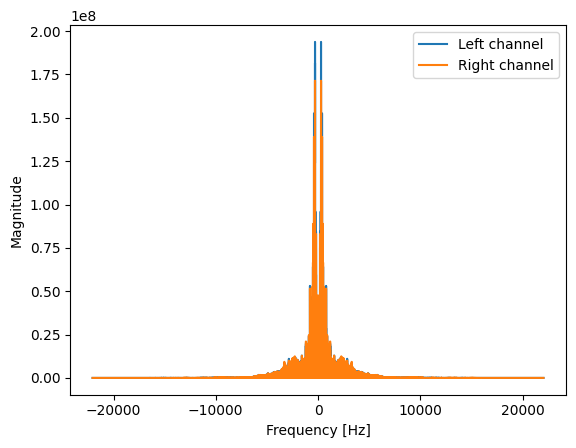

In [259]:
modulated_l = fft.fftshift(fft.fft(left_mod))
modulated_r = fft.fftshift(fft.fft(right_mod))
freq = fft.fftshift(fft.fftfreq(data.shape[0], 1 / samplerate))

plt.plot(freq, np.abs(modulated_l), label="Left channel")
plt.plot(freq, np.abs(modulated_r), label="Right channel")
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()

In [233]:
wavfile.write(OUTL_FILE, samplerate, left_mod.astype(np.int16))
wavfile.write(OUTR_FILE, samplerate, right_mod.astype(np.int16))